# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

## EXPLORATORY DATA ANALYSIS, PREPROCESSING AND F.E.

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\labra\appdata\local\programs\python\python38\lib\site-packages (0.24.2)


You should consider upgrading via the 'c:\users\labra\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install xgboost --upgrade

You should consider upgrading via the 'c:\users\labra\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


<hr>

## Loading the .csv dataset from GitHub

In [3]:
import pandas as pd

In [4]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')
df_base_for_training.head()

--2021-05-30 08:52:03--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376 (90K) [text/plain]
Saving to: 'ForTraining.csv'

     0K .......... .......... .......... .......... .......... 55%  804K 0s
    50K .......... .......... .......... ..........           100% 1.31M=0.09s

2021-05-30 08:52:03 (978 KB/s) - 'ForTraining.csv' saved [92376/92376]



,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No


In [5]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')
df_orden_materias.head()

--2021-05-30 08:52:04--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63920 (62K) [text/plain]
Saving to: 'OrdenMaterias.csv'

     0K .......... .......... .......... .......... .......... 80%  710K 0s
    50K .......... ..                                         100% 1.44M=0.08s

2021-05-30 08:52:04 (792 KB/s) - 'OrdenMaterias.csv' saved [63920/63920]



,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [6]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')
df_tabla_conexiones.head()

--2021-05-30 08:52:04--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243492 (238K) [text/plain]
Saving to: 'TablaConexiones.csv'

     0K .......... .......... .......... .......... .......... 21%  770K 0s
    50K .......... .......... .......... .......... .......... 42% 1.44M 0s
   100K .......... .......... .......... .......... .......... 63% 1.23M 0s
   150K .......... .......... .......... .......... .......... 84% 1.28M 0s
   200K .......... .......... .......... .......              100% 1.29M=0.2s

2021-05-30 08:52:05 (1.13 MB/s) - 'TablaConexiones.csv' saved [243492/243492]



,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85


In [7]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')
df_tabla_tareas.head()

--2021-05-30 08:52:05--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310923 (304K) [text/plain]
Saving to: 'TablaTareas.csv'

     0K .......... .......... .......... .......... .......... 16%  728K 0s
    50K .......... .......... .......... .......... .......... 32% 1.29M 0s
   100K .......... .......... .......... .......... .......... 49%  991K 0s
   150K .......... .......... .......... .......... .......... 65% 1.16M 0s
   200K .......... .......... .......... .......... .......... 82% 1.08M 0s
   250K .......... .......... .......... .......... .......... 98% 1.11M 0s
   300K ...                                                   100% 1.57M=0.3s

2021-05-30 08

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,81328.0,2019 - 05,99.000000,10.0,0.0,0.0,10.0
1,99206.0,2020 - 02,80.777500,10.0,2.0,0.0,12.0
2,94582.0,2020 - 01,79.666000,10.0,0.0,0.0,10.0
3,87564.0,2019 - 07,0.000000,0.0,15.0,0.0,15.0
4,87971.0,2019 - 08,36.363636,5.0,6.0,0.0,11.0


In [8]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [9]:
df_base_for_training.tail()

,studentId,reducido,ciclo,Graduado
2495,89685.0,Estrat. Comercial,2019 - 08,No
2496,77590.0,Crianza Hijos,2019 - 06,Si
2497,57623.0,Mercadotecnia,2018 - 02,Si
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No
2499,88250.0,Prof. Deportiva.,2019 - 08,No


In [10]:
df_tabla_tareas.tail()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
6293,80467.0,2019 - 05,20.000000,1.0,4.0,0.0,5.0
6294,80249.0,2019 - 05,50.600000,3.0,2.0,0.0,5.0
6295,85857.0,2019 - 07,81.428571,13.0,1.0,0.0,14.0
6296,98880.0,2020 - 02,91.212727,11.0,0.0,0.0,11.0
6297,71859.0,2019 - 02,87.333000,10.0,0.0,0.0,10.0


In [11]:
# Join df_base_for_training and df_tabla_tareas
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0


In [12]:
# Join df and df_tabla_conexiones

df = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()


,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88


In [22]:
# Información acerca de las columnas del dataset unido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo                  2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   Calificacion_Promedio  2500 non-null   float64
 5   Tareas_Puntuales       2500 non-null   float64
 6   Tareas_No_Entregadas   2500 non-null   float64
 7   Tareas_Retrasadas      2500 non-null   float64
 8   Total_Tareas           2500 non-null   float64
 9   Dias_Conectado         2500 non-null   float64
 10  Minutos_Promedio       2500 non-null   float64
 11  Minutos_Total          2500 non-null   float64
dtypes: float64(9), object(3)
memory usage: 253.9+ KB


De la información de arriba ud puede observar que hay valores Null/NaN en algunas de las columnas.

Para que nuestro modelo quede bien entrenado necesitamos procesar estos valores nulos de una forma adecuada.

Usted escogera la mejor estrategia como parte del desafío, pero en la siguiente celda encuentra un **ejemplo** the como puede hacer este procesamiento usanto la libreria *scikit-learn*.

<hr>

## Pre-procesando

In [14]:
# Aplicando la función para borrar todas las filas con valor NaN en la columna ``Graduado``:
df2 = df.copy()

In [15]:
df2.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88


In [16]:
df2.shape

(2500, 12)

In [17]:
df_orden_materias.head()

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [54]:
# Extract the class from each student
clases = []
for reducido,ciclo in df2[["reducido", "ciclo"]].values:
    clase = df_orden_materias[df_orden_materias["reducido"] == reducido][ciclo].values[0]
    clases.append(clase)

In [55]:
clases[:5]

['Liderazgo y Motivación',
 'Finanzas para no Financieros',
 'Liderazgo y Motivación',
 'La Tecnología en la Educación',
 'Liderazgo y Motivación']

In [58]:
#Append Classes
import numpy as np

clases_np = np.array(clases)
df2["clase"] = clases_np
df2.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,clase
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación


In [60]:
len(df2["clase"].unique())

191

In [68]:
import seaborn as sns
for clase in df2.clase.unique():
    data = df2[df2["clase"] == clase]
    lendata = len(data)
    graduados = len(data[data["Graduado"] == "Si"])
    print("{}:\t\tgraduados = {}\tno grads = {} ".format(clase, graduados, lendata - graduados))

Liderazgo y Motivación:		graduados = 88	no grads = 60 
Finanzas para no Financieros:		graduados = 7	no grads = 9 
La Tecnología en la Educación:		graduados = 15	no grads = 21 
Nuevas Herramientas para Enseñar:		graduados = 11	no grads = 6 
Planeación Estratégica:		graduados = 27	no grads = 38 
Gestión de las Adquisiciones:		graduados = 24	no grads = 15 
Empowerment:		graduados = 17	no grads = 11 
Toma de Decisiones:		graduados = 16	no grads = 18 
Crecimiento y Desarrollo Humano:		graduados = 13	no grads = 15 
Mercadotecnia Estratégica:		graduados = 21	no grads = 23 
Trabajo en Equipo:		graduados = 26	no grads = 14 
Finanzas para el Manejo de Marcas:		graduados = 9	no grads = 10 
Modelos y Herramientas para la Administración:		graduados = 25	no grads = 10 
Estrategias de negocios:		graduados = 10	no grads = 18 
Evaluación de Instituciones Educativos:		graduados = 2	no grads = 9 
Sistemas de Información de Mercadotecnia:		graduados = 10	no grads = 11 
Estrategias de Aprendizaje en Educac

El diseño experiencial y el prototipo:		graduados = 2	no grads = 1 
Open data:		graduados = 1	no grads = 2 
El niño de Preescolar y su aprendizaje:		graduados = 4	no grads = 3 
Programación Unity:		graduados = 0	no grads = 4 
Innovación y desarrollo de productos:		graduados = 0	no grads = 1 
Persona, formación y trascendencia:		graduados = 0	no grads = 2 
Introducción a la Inteligencia Artificial:		graduados = 0	no grads = 1 
Factores de riesgo / Conductas de riesgo. Interacciones precoces:		graduados = 5	no grads = 1 
Del modernismo a las vanguardias. La apuesta por una estética propia.:		graduados = 0	no grads = 2 
Administración de riesgos:		graduados = 1	no grads = 1 
Tendencia de las organizaciones:		graduados = 1	no grads = 0 
BEPS:		graduados = 0	no grads = 1 
Flujo de datos transfronterizos:		graduados = 3	no grads = 2 
E-Health Y Telemedicina:		graduados = 0	no grads = 1 
Cultura, Clima y Satisfacción Laboral:		graduados = 1	no grads = 0 
Fundamentos de coaching educativo:		gr

## Correlaciones para borrar tablas

In [69]:
import numpy as np

def ciclo(X):
    x = int(X[0:4])
    y = int(X[7:])
    return [x,y]
ns = []
for x in df2["ciclo"]:
    ns.append(ciclo(x))
data = np.array(ns)
dataset = pd.DataFrame({'Año': data[:, 0], 'Mes': data[:, 1]})


In [70]:
df2["Año"] = dataset["Año"]
df2["Mes"] = dataset["Mes"]
df2.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,clase,Año,Mes
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación,2017,3
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros,2017,3
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación,2017,3
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación,2017,3
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación,2017,3


In [73]:
df_corr = df2.copy()
df_corr.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,clase,Año,Mes
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación,2017,3
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros,2017,3
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación,2017,3
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación,2017,3
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación,2017,3


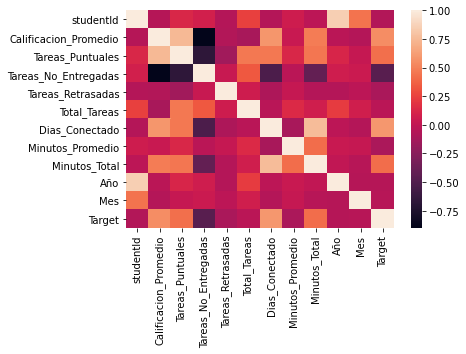

In [74]:
#df_corr["ciclo"] = df_corr["ciclo"].astype('category').cat.codes
df_corr["Target"]=df_corr["Graduado"].astype('category').cat.codes
sns.heatmap(df_corr.corr())

In [75]:
df_corr.describe()

,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000
mean,76826.320800,71.446212,8.826800,2.165200,0.182800,11.174800,49.085600,259.036880,12190.417404,2018.72880,5.274000,0.512000
std,10531.545832,28.357020,4.105063,3.795428,0.651732,3.232031,33.072075,145.739734,9760.184061,0.56655,2.141579,0.499956
min,45898.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2017.00000,1.000000,0.000000
25%,71813.250000,65.667000,7.000000,0.000000,0.000000,9.000000,23.000000,158.080298,5080.940000,2019.00000,4.000000,0.000000
50%,79062.500000,82.777083,9.000000,0.000000,0.000000,10.000000,42.000000,231.097917,10019.110000,2019.00000,6.000000,1.000000
75%,84517.250000,90.748141,11.000000,2.000000,0.000000,13.000000,71.000000,332.742845,16644.392500,2019.00000,7.000000,1.000000
max,91346.000000,100.000000,29.000000,34.000000,9.000000,34.000000,199.000000,1173.203571,107245.770000,2019.00000,8.000000,1.000000


C:\Users\labra\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


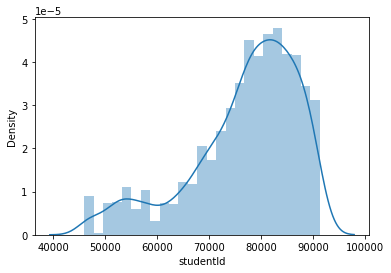

In [76]:
import seaborn as sns
%matplotlib inline

ax = sns.distplot(df_corr["studentId"])

In [77]:
df_corr["CICLO"]=(df_corr["Año"]-df_corr["Año"].min())+(df_corr["Mes"]/df_corr["Mes"].max())
df_corr.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,clase,Año,Mes,Target,CICLO
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación,2017,3,1,0.375
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros,2017,3,0,0.375
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación,2017,3,0,0.375
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación,2017,3,1,0.375
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación,2017,3,1,0.375


In [78]:
df_corr.corr()

,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target,CICLO
studentId,1.000000,-0.049733,0.126837,0.080885,-0.054803,0.245032,-0.057277,0.061247,-0.019403,0.855830,0.438409,-0.061640,0.980163
Calificacion_Promedio,-0.049733,1.000000,0.753701,-0.898513,-0.062307,-0.110413,0.588409,0.038412,0.476329,-0.030236,-0.053610,0.552986,-0.051238
Tareas_Puntuales,0.126837,0.753701,1.000000,-0.662619,-0.138629,0.464040,0.462821,0.132107,0.451852,0.120883,0.021696,0.427524,0.120918
Tareas_No_Entregadas,0.080885,-0.898513,-0.662619,1.000000,0.031142,0.338991,-0.517712,-0.024078,-0.412987,0.069414,0.045285,-0.468256,0.083736
Tareas_Retrasadas,-0.054803,-0.062307,-0.138629,0.031142,1.000000,0.062143,-0.084809,0.022031,-0.056462,-0.056421,-0.016691,-0.100684,-0.059298
Total_Tareas,0.245032,-0.110413,0.464040,0.338991,0.062143,1.000000,-0.037221,0.143959,0.077542,0.223673,0.077369,-0.027177,0.239955
Dias_Conectado,-0.057277,0.588409,0.462821,-0.517712,-0.084809,-0.037221,1.000000,-0.108876,0.766813,-0.022317,-0.059949,0.597712,-0.046697
Minutos_Promedio,0.061247,0.038412,0.132107,-0.024078,0.022031,0.143959,-0.108876,1.000000,0.419386,0.042163,0.021863,-0.096152,0.048404
Minutos_Total,-0.019403,0.476329,0.451852,-0.412987,-0.056462,0.077542,0.766813,0.419386,1.000000,0.000568,-0.041540,0.414510,-0.017575
Año,0.855830,-0.030236,0.120883,0.069414,-0.056421,0.223673,-0.022317,0.042163,0.000568,1.000000,-0.049876,-0.047841,0.900359


In [79]:
df_corr.describe()

,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,Año,Mes,Target,CICLO
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.00000
mean,76826.320800,71.446212,8.826800,2.165200,0.182800,11.174800,49.085600,259.036880,12190.417404,2018.72880,5.274000,0.512000,2.38805
std,10531.545832,28.357020,4.105063,3.795428,0.651732,3.232031,33.072075,145.739734,9760.184061,0.56655,2.141579,0.499956,0.61442
min,45898.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2017.00000,1.000000,0.000000,0.37500
25%,71813.250000,65.667000,7.000000,0.000000,0.000000,9.000000,23.000000,158.080298,5080.940000,2019.00000,4.000000,0.000000,2.12500
50%,79062.500000,82.777083,9.000000,0.000000,0.000000,10.000000,42.000000,231.097917,10019.110000,2019.00000,6.000000,1.000000,2.62500
75%,84517.250000,90.748141,11.000000,2.000000,0.000000,13.000000,71.000000,332.742845,16644.392500,2019.00000,7.000000,1.000000,2.87500
max,91346.000000,100.000000,29.000000,34.000000,9.000000,34.000000,199.000000,1173.203571,107245.770000,2019.00000,8.000000,1.000000,3.00000


Borrando outliers <>4 std en calificacion promedio

C:\Users\labra\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


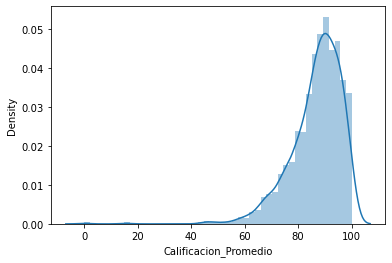

In [80]:
ax = sns.distplot(df_corr["Calificacion_Promedio"][(df_corr["Graduado"])=="Si"])

In [81]:
df_corr[  (df_corr["Calificacion_Promedio"]<70) &  (df_corr["Graduado"]=="Si") ]

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,clase,Año,Mes,Target,CICLO
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación,2017,3,1,0.375
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación,2017,3,1,0.375
8,46374.0,Educacion,2017 - 03,Si,66.833333,8.0,3.0,1.0,12.0,35.0,273.005429,9555.19,La Tecnología en la Educación,2017,3,1,0.375
40,47679.0,Intro. Fin,2017 - 04,Si,67.037778,9.0,0.0,0.0,9.0,35.0,105.220000,3682.70,Planeación Estratégica,2017,4,1,0.500
48,50013.0,Planeacion Estrat.,2017 - 05,Si,67.272727,9.0,2.0,0.0,11.0,11.0,59.596364,655.56,Toma de Decisiones,2017,5,1,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,91004.0,Alim. Y Nut. Salud,2019 - 08,Si,66.889333,12.0,3.0,0.0,15.0,30.0,214.698333,6440.95,Antecedentes y evolución de la alimentación,2019,8,1,3.000
2461,91013.0,Alim. Y Nut. Salud,2019 - 08,Si,65.333333,11.0,3.0,1.0,15.0,57.0,343.630877,19586.96,Antecedentes y evolución de la alimentación,2019,8,1,3.000
2465,91054.0,Coaching de Vida,2019 - 08,Si,63.242000,4.0,1.0,0.0,5.0,27.0,301.378148,8137.21,Comunicación y Negociación Efectiva,2019,8,1,3.000
2485,91180.0,Est. Temprana,2019 - 08,Si,68.571429,11.0,3.0,0.0,14.0,42.0,527.740714,22165.11,Habilidades Sociales y Emocionales,2019,8,1,3.000


In [82]:
reds = df_corr["reducido"].value_counts()
reds

Alim. Y Nut. Salud     263
Direc. Proy.           154
Educacion              132
Est. Temprana          115
Big Data                96
                      ... 
Inclusion Laboral        1
Neg. Dig. Y Eco. C.      1
Disc. Formativa          1
Transf. Globales         1
Monitores Esc.           1
Name: reducido, Length: 88, dtype: int64

In [83]:
d="Si"
std=df_corr[(df_corr["Graduado"]==d)]["Calificacion_Promedio"].std()
mean = df_corr[(df_corr["Graduado"]==d)]["Calificacion_Promedio"].mean()
print(std)
print(mean)

#df_corr = df_corr.drop(df_corr[(df_corr["Graduado"]=="Si")&(df_corr["Calificacion_Promedio"]<(mean-3*std))].index)
#df_corr[(df_corr["Graduado"]=="Si")]["Calificacion_Promedio"].mean()


9.67292093249509
86.75224448910089


In [84]:
df_corr[(df_corr["Graduado"]=="Si")]["reducido"].value_counts()

Alim. Y Nut. Salud    125
Direc. Proy.           97
Educacion              72
Est. Temprana          67
Big Data               54
                     ... 
Transf. Globales        1
Dere. Sanitario         1
Inclusion Laboral       1
Precios Transf.         1
Monitores Esc.          1
Name: reducido, Length: 77, dtype: int64

In [85]:
df_corr.shape

(2500, 17)

In [86]:
std=df_corr[(df_corr["Graduado"]=="Si")]["Tareas_Retrasadas"].std()
mean = df_corr[(df_corr["Graduado"]=="Si")]["Tareas_Retrasadas"].mean()
#print(str(std)+" "+str(mean))

### pegar columnas orden materias

In [87]:
dfM = df_corr.copy()
dfM.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,clase,Año,Mes,Target,CICLO
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación,2017,3,1,0.375
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros,2017,3,0,0.375
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación,2017,3,0,0.375
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación,2017,3,1,0.375
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación,2017,3,1,0.375


In [88]:
df_orden_materias.head()

,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...


In [89]:
def om(X):
    o = [
    ('Alim. Y Nut. Salud', 'BSN'),
    ('Direc. Proy.','AN' ),
    ('Educacion', 'EDU'),
    ('Est. Temprana', 'EDU'),
    ('Big Data', 'TI'),
    ('Hab. Geren.', 'AN'),
    ('E. Lectoescritura','EDU' ),
    ('Mercadotecnia', 'MER'),
    ('Planeacion Estrat.', 'AN'),
    ('Lider. Inst. Edu.','EDU' ),
    ('Comp. Directivas','AN' ),
    ('Intro. Fin', 'FZ'),
    ('Ventas Estrat.','AN' ),
    ('Admon Fin.','FZ' ),
    ('Mkt. Digital','MER' ),
    ('Edu. Preescolar', 'EDU'),
    ('Prof. Deportiva.','EDU' ),
    ('Neuromarketing', 'MER'),
    ('Adm. Salud', 'BSN'),
    ('Coaching de Vida', 'EDU'),
    ('Gest. Esc.', 'EDU'),
    ('Gest. Tal.', 'RH'),
    ('B. I.', 'TI'),
    ('Diagn. Psicoped.', 'EDU'),
    ('Programacion de Apps','TI' ),
    ('Direc. Estrat. Neg','AN' ),
    ('Interv. Psicoped','EDU' ),
    ('Inn. Tec. Edu.','EDU' ),
    ('Crianza Hijos', 'BSN'),
    ('Psicoped. Escolar', 'EDU'),
    ('Comp. Dig. Docentes','EDU' ),
    ('Adm. Emp.','AN' ),
    ('Fin. Corp. Avan.', 'FZ'),
    ('Des. Neg. y Empren.', 'AN'),
    ('Direc. Emp. Fam.', 'AN'),
    ('Trastornos Alimen.', 'BSN'),
    ('Inn. Negocios','AN' ),
    ('E-Commerce', 'FZ'),
    ('Design Think', 'AN'),
    ('Estrategia Tal. Hum.', 'RH'),
    ('Desarrollo Mot.', 'EDU'),
    ('Des. Cap. Hum.', 'RH'),
    ('Prog. Neuroling.', 'EDU'),
    ('Bien. Salud y Calidad', 'BSN'),
    ('Estrat. Comercial','AN' ),
    ('Psicopat. Adol.','BSN' ),
    ('Prin. Fiscales', 'FZ'),
    ('Com. Corp.', 'RH'),
    ('Calidad Educativa', 'EDU'),
    ('Inn. Diseno Edu.', 'EDU'),
    ('Obesidad. Inf.','BSN' ),
    ('P. Aux. Psic.','BSN' ),
    ('Prot. Datos. P', 'DER'),
    ('Mkt. Farmaceutico', 'MER'),
    ('Inc. Edu.', 'EDU'),
    ('Est. Prac. Edu.', 'EDU'),
    ('Interv. Edu.', 'EDU'),
    ('Efect. Cap. Hum.', 'RH'),
    ('Edu. Primaria','EDU' ),
    ('Cloud Computing', 'TI'),
    ('Hist. Arte. Medieval','AH' ),
    ('Mkt. Farmaceutico A.','TI' ),
    ('Blockchain', 'TI'),
    ('Ciberseguridad', 'TI'),
    ('Marca Personal', 'MER'),
    ('I. A.', 'TI'),
    ('Gob. Adm. P. E.', 'AN'),
    ('Dere. Sanitario','DER' ),
    ('Coaching Edu.', 'EDU'),
    ('Des. Videojuegos', 'TI'),
    ('Adm. Riesgos','AN' ),
    ('Comp. Doc. S XXI', 'AH'),
    ('Exp. Clin. Elec.', 'BSN'),
    ('Oren. Edu. Fam', 'EDU'),
    ('Big Data en Edu', 'EDU'),
    ('Lit. Lat. S. XX', 'AH'),
    ('Precios Transf.', 'FZ'),
    ('Fintech','FZ' ),
    ('Hist. Arte. Clasico','AH' ),
    ('Eco. Digital', 'AN'),
    ('Inv. Mercados', 'FZ'),
    ('Hist. Arte. Ant.','AH' ),
    ('Bus. Analytics', 'AN'),
    ('Neg. Dig. Y Eco. C.', 'AN'),
    ('Inclusion Laboral', 'RH'),
    ('Disc. Formativa','EDU' ),
    ('Transf. Globales', 'AN'),
    ('Monitores Esc.', 'EDU')]
    r = X.reducido
    c = X.ciclo
    for a,b in o:
        if r == a:
            return b
    return "Other"

In [90]:
Orgs = dfM.apply(om,axis=1)
Orgs.head()

0    MER
1     FZ
2     AN
3    EDU
4    EDU
dtype: object

In [91]:
dfM["Org"] = Orgs
dfM.head()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,clase,Año,Mes,Target,CICLO,Org
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación,2017,3,1,0.375,MER
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros,2017,3,0,0.375,FZ
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación,2017,3,0,0.375,AN
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación,2017,3,1,0.375,EDU
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación,2017,3,1,0.375,EDU


In [92]:
dfM[["Org","reducido"]].tail(10)

,Org,reducido
2490,AN,Comp. Directivas
2491,TI,I. A.
2492,RH,Com. Corp.
2493,EDU,Est. Prac. Edu.
2494,DER,Prot. Datos. P
2495,AN,Adm. Emp.
2496,TI,I. A.
2497,EDU,Gest. Esc.
2498,EDU,Gest. Esc.
2499,BSN,Psicopat. Adol.


In [93]:
dfM["Org"].value_counts()

EDU    815
AN     605
BSN    414
TI     197
FZ     176
MER    173
RH      92
AH      14
DER     14
Name: Org, dtype: int64

### Manejando variables Categoricas

Como se menciono antes, los computadores no son buenos con las variables categoricas.

Mientras que nosotros entendemos bien las variables categoricas, es debido a un conocimiento previo quie el computador no tiene.

La mayoria de tecnicas de Machine Learning y modelso trabajan con un set limitado de datos (Tipicamente binario). 

Las redes neurales consumenda data y producen resultados en el rango de 0..1 t raramente van mas alla del alcance.

En resumen, la gran mayoria de algoritmos de machine learning aceptan data de entrada  ("training data") de donde los features son extraidos.

Basado en estos features, un modelo matematico es creado, el cual es usado para hacer una predicción o decision sin ser programado explicitamente para esa tarea.

Dado un dataset con con 2 features, vamos a dejar que encoder encuentre los valores unicos por features y transforme la data a binario usando la tecnica one-hot encoding.

In [99]:
df2X = dfM.drop(columns=["studentId","reducido","Target", "ciclo"])
df2X.head()

,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,clase,Año,Mes,CICLO,Org
0,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación,2017,3,0.375,MER
1,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros,2017,3,0.375,FZ
2,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación,2017,3,0.375,AN
3,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación,2017,3,0.375,EDU
4,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación,2017,3,0.375,EDU


In [100]:
df2X.to_csv("AnahuacFull.csv")

<hr>